# T2.1 Algebra lineal: reducción de la dimensión y cálculo de derivadas

**Índice**

> 1 Matrices de datos<br>
>> 1.1 Suma de trozos de la matriz<br>
>> 1.2 Escalado de filas y columnas de una matriz<br>
>> 1.3 Suma de cuadrados, centrado y matriz de dispersión<br>
>> 1.4 Matriz de Gram<br>
>> 1.5 Matriz de distancias<br>
>
> 2 Diagonalización<br>
>> 2.1 Conceptos básicos<br>
>>> 2.1.1 Valor y vector propio<br>
>>> 2.1.2 Ecuación característica<br>
>>> 2.1.3 Propiedades<br>
>>
>> 2.2 Diagonalización<br>
>>> 2.2.1 Ecuación global<br>
>>> 2.2.2 Descomposición propia<br>
>
> 3 Matrices reales y simétricas<br>
>> 3.1 Valores y vectores propios de matrices reales y simétricas<br>
>>> 3.1.1 Descomposición propia de una matriz real y simétrica<br>
>>> 3.1.2 Comprobación de definición positiva<br>
>>
>> 3.2 Geometría de las formas cuadráticas<br>
>
> 4 Reducción de la dimensión<br>
>> 4.1 Análisis de componentes principales (PCA)<br>
>
> 5 Descomposición en valores singulares (SVD)<br>
>> 5.1 Conceptos básicos<br>
>> 5.2 Conexión entre la SVD y la EVD<br>
>>> 5.2.1 Matriz cuadrada real, simétrica y definida positiva<br>
>>> 5.2.2 Matriz real arbitraria<br>
>>
>> 5.3 SVD truncada<br>
>>> 5.3.1 SVD truncada<br>
>>> 5.3.2 PCA con la SVD<br>
>
> 6 Cálculo matricial<br>
>> 6.1 Preliminares<br>
>>> 6.1.1 Formato numerador o Jacobiana<br>
>>> 6.1.2 Otros formatos<br>
>>
>> 6.2 Identidades básicas<br>
>> 6.3 Derivadas básicas<br>
>> 6.4 Softmax<br>
>> 6.5 Transformaciones lineales<br>
>> 6.6 Regresión logística<br>

<p style="page-break-after:always;"></p>

# 1 Matrices de datos


Sea $\mathbf{X}\in\mathbb{R}^{N\times D}$ una matriz de $N$ datos $D$-dimensionales. 

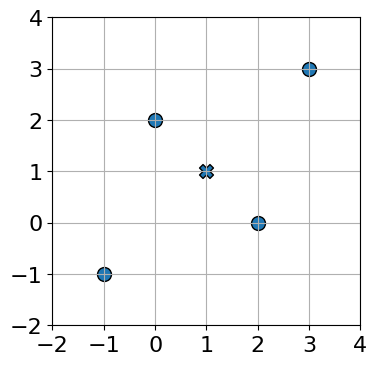

In [10]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0)
fig, ax = plt.subplots(figsize=(4, 4)); ax.set_aspect("equal"); plt.grid(True)
plt.axis([-2, 4, -2, 4]); plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
plt.scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100);

<p style="page-break-after:always;"></p>

## 1.1 Suma de trozos de la matriz

**Suma de filas:** $\;\boldsymbol{1}_N^t\mathbf{X}=(\sum\nolimits_n x_{n1},\;\cdots\;,\sum\nolimits_nx_{nD})$

**Media de los datos:** $\;\bar{\boldsymbol{x}}^t=\frac{1}{N}\boldsymbol{1}_N^t\mathbf{X}$

**Suma de columnas:** $\;\mathbf{X}\boldsymbol{1}_D=\begin{pmatrix}\sum_dx_{1d}\\\vdots\\\sum_dx_{Nd}\end{pmatrix}$

**Suma de todas las entradas:** $\;\boldsymbol{1}_N^t\mathbf{X}\boldsymbol{1}_D=\sum\nolimits_{ij}x_{ij}$

**Media global de los datos:** $\;\bar{x}=\frac{1}{ND}\boldsymbol{1}_N^t\mathbf{X}\boldsymbol{1}_D$

In [2]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float); N, D = X.shape
print("Suma de filas: ", np.ones(N) @ X, np.sum(X, axis=0))
print("Media de los datos: ", 1/N * np.ones(N) @ X, np.mean(X, axis=0))
print("Suma de columnas: ", X @ np.ones(D), np.sum(X, axis=1))
print("Suma de todas las entradas: ", np.ones(N) @ X @ np.ones(D), np.sum(X))
print("Media global de los datos: ", 1/(N*D) * np.ones(N) @ X @ np.ones(D), np.mean(X))

Suma de filas:  [4. 4.] [4. 4.]
Media de los datos:  [1. 1.] [1. 1.]
Suma de columnas:  [-2.  2.  2.  6.] [-2.  2.  2.  6.]
Suma de todas las entradas:  8.0 8.0
Media global de los datos:  1.0 1.0


<p style="page-break-after:always;"></p>

## 1.2 Escalado de filas y columnas de una matriz

**Escalado de filas con $\mathbf{S}=\operatorname{diag}(\boldsymbol{s})$:** $\quad\mathbf{S}\mathbf{X}=\begin{bmatrix}s_1&\cdots&0\\&\ddots&\\0&\cdots&s_N\end{bmatrix}\begin{bmatrix}x_{11}&\cdots&x_{1D}\\&\ddots&\\x_{N1}&\cdots&x_{ND}\end{bmatrix}=\begin{bmatrix}s_1x_{11}&\cdots&s_1x_{1D}\\&\ddots&\\s_Nx_{N1}&\cdots&s_Nx_{ND}\end{bmatrix}$

**Escalado de columnas con $\mathbf{S}=\operatorname{diag}(\boldsymbol{s})$:** $\quad\mathbf{X}\mathbf{S}=\begin{bmatrix}x_{11}&\cdots&x_{1D}\\&\ddots&\\x_{N1}&\cdots&x_{ND}\end{bmatrix}\begin{bmatrix}s_1&\cdots&0\\&\ddots&\\0&\cdots&s_D\end{bmatrix}=\begin{bmatrix}s_1x_{11}&\cdots&s_Dx_{1D}\\&\ddots&\\s_1x_{N1}&\cdots&s_Dx_{ND}\end{bmatrix}$

<p style="page-break-after:always;"></p>

**Estandarización:** $\quad\operatorname{standardize}(\mathbf{X})=(\mathbf{X}-\boldsymbol{1}_N\boldsymbol{\mu}^t)\operatorname{diag}(\boldsymbol{\sigma})^{-1}$

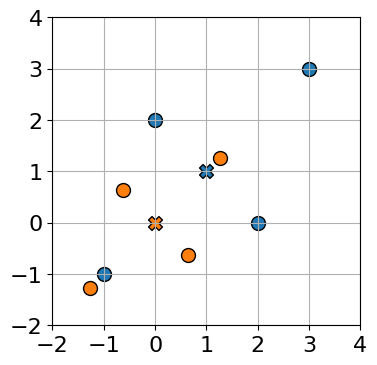

In [12]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0); sigma = np.std(X, axis=0); Xstd = (X - m) / sigma
fig, ax = plt.subplots(figsize=(4, 4)); ax.set_aspect("equal"); plt.grid(True)
plt.axis([-2, 4, -2, 4]); plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
plt.scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100);
plt.scatter(0, 0, facecolor='C1', edgecolor='k', s=100, marker="X")
plt.scatter(Xstd[:,0], Xstd[:,1], facecolor='C1', edgecolor='k', s=100);

<p style="page-break-after:always;"></p>

## 1.3 Suma de cuadrados, centrado y matriz de dispersión

**Suma de cuadrados:** $\;\displaystyle\mathbf{S}_0=\mathbf{X}^t\mathbf{X}=[\boldsymbol{x}_1,\boldsymbol{x}_2,\dotsc,\boldsymbol{x}_N]\begin{bmatrix}\boldsymbol{x}_1^t\\\boldsymbol{x}_2^t\\\vdots\\\boldsymbol{x}_N^t\end{bmatrix}=\sum_{n=1}^N\boldsymbol{x}_n\boldsymbol{x}_n^t=\sum_{n=1}^N\begin{pmatrix}x_{n1}^2&\cdots&x_{n1}x_{nD}\\&\ddots\\x_{nD}x_{n1}&\cdots&x_{nD}^2\end{pmatrix}$

**Matriz de centrado:** $\;\mathbf{C}_N=\mathbf{I}_N-\frac{1}{N}\boldsymbol{1}_N\boldsymbol{1}_N^t,\,$ simétrica e idempotente ($\mathbf{C}_N^k=\mathbf{C}_N$, $k\geq 1$), centra los datos
$$\tilde{\mathbf{X}}=\mathbf{X}-\boldsymbol{1}_N\bar{\boldsymbol{x}}^t=\mathbf{X}-\frac{1}{N}\boldsymbol{1}_N\boldsymbol{1}_N^t\mathbf{X}=\mathbf{C}_N\mathbf{X}$$

**Matriz de dispersión:** $\;\displaystyle\mathbf{S}_{\bar{\boldsymbol{x}}}=\sum_{n=1}^N(\boldsymbol{x}_n-\bar{\boldsymbol{x}})(\boldsymbol{x}_n-\bar{\boldsymbol{x}})^t=\tilde{\mathbf{X}}^t\tilde{\mathbf{X}}=\mathbf{X}^t\mathbf{C}_N^t\mathbf{C}_N\mathbf{X}=\mathbf{X}^t\mathbf{C}_N\mathbf{X}$

In [4]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float); N, D = X.shape
print("Suma de cuadrados:\n", X.T @ X)
C = np.eye(N) - np.ones((N, N))/N; print("Matriz de centrado:\n", C)
print("Matriz de dispersión:\n", X.T @ C @ X, "\n", N * np.cov(X, rowvar=False, bias=True))

Suma de cuadrados:
 [[14. 10.]
 [10. 14.]]
Matriz de centrado:
 [[ 0.75 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25  0.75]]
Matriz de dispersión:
 [[10.  6.]
 [ 6. 10.]] 
 [[10.  6.]
 [ 6. 10.]]


<p style="page-break-after:always;"></p>

## 1.4 Matriz de Gram

**Matriz de Gram:** $\;\mathbf{K}=\mathbf{X}\mathbf{X}^t=\begin{bmatrix}\boldsymbol{x}_1^t\boldsymbol{x}_1&\cdots&\boldsymbol{x}_1^t\boldsymbol{x}_N\\&\vdots\\\boldsymbol{x}_N^t\boldsymbol{x}_1 &\cdots&\boldsymbol{x}_N^t\boldsymbol{x}_N\end{bmatrix}\quad$ (matriz de productos escalares)

**Gram para datos centrados a partir de Gram:** $\quad$ **truco del doble centrado**
$$\tilde{\mathbf{K}}=\tilde{\mathbf{X}}\tilde{\mathbf{X}}^t=\mathbf{C}_N\mathbf{X}(\mathbf{C}_N\mathbf{X})^t=\mathbf{C}_N\mathbf{K}\mathbf{C}_N$$ 

In [5]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float); N, D = X.shape
K = X @ X.T; print("Gram:\n", K)
Xc = X - np.mean(X, axis=0)
Kc = Xc @ Xc.T; print("Gram centrados:\n", Kc)
C = np.eye(N) - np.ones((N, N))/N
Kc_K = C @ K @ C; print("Gram centrados con truco:\n", Kc_K)

Gram:
 [[ 2. -2. -2. -6.]
 [-2.  4.  0.  6.]
 [-2.  0.  4.  6.]
 [-6.  6.  6. 18.]]
Gram centrados:
 [[ 8.  0.  0. -8.]
 [ 0.  2. -2.  0.]
 [ 0. -2.  2.  0.]
 [-8.  0.  0.  8.]]
Gram centrados con truco:
 [[ 8.  0.  0. -8.]
 [ 0.  2. -2.  0.]
 [ 0. -2.  2.  0.]
 [-8.  0.  0.  8.]]


<p style="page-break-after:always;"></p>

## 1.5 Matriz de distancias

**Distancia (Euclídea) al cuadrado entre $\,\boldsymbol{x}, \boldsymbol{y}\in\mathbb{R}^D$:** $\quad \lVert\boldsymbol{x}-\boldsymbol{y}\rVert_2^2=(\boldsymbol{x}-\boldsymbol{y})^t(\boldsymbol{x}-\boldsymbol{y})=\lVert\boldsymbol{x}\rVert_2^2-2\boldsymbol{x}^t\boldsymbol{y}+\lVert\boldsymbol{y}\rVert_2^2$

**Extensión a matrices de datos, $\mathbf{X}\in\mathbb{R}^{N\times D},\,\mathbf{Y}\in\mathbb{R}^{M\times D}$:** $\quad\mathbf{D}\in\mathbb{R}^{N\times M}$
$$\mathbf{D}=\operatorname{diag}(\mathbf{X}\mathbf{X}^t)\boldsymbol{1}_M^t-2\mathbf{X}\mathbf{Y}^t+\boldsymbol{1}_N\operatorname{diag}(\mathbf{Y}\mathbf{Y}^t)^t$$

**Caso $\mathbf{Y}=\mathbf{X}$:**$\qquad\mathbf{D}=\mathbf{H}-2\mathbf{K}+\mathbf{H}^t\quad$ con $\quad\mathbf{H}=\operatorname{diag}(\mathbf{K})\boldsymbol{1}_N^t\;$ y $\;\mathbf{K}=\mathbf{X}\mathbf{X}^t\;$ (Gram)

In [6]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
K = X @ X.T; H = np.diag(K).reshape(-1, 1); print(H - 2*K + H.T)

[[ 0. 10. 10. 32.]
 [10.  0.  8. 10.]
 [10.  8.  0. 10.]
 [32. 10. 10.  0.]]


In [7]:
import numpy as np
import scipy.spatial.distance as dist
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
V = dist.pdist(X, 'sqeuclidean')
print(V, "\n", dist.squareform(V))

[10. 10. 32.  8. 10. 10.] 
 [[ 0. 10. 10. 32.]
 [10.  0.  8. 10.]
 [10.  8.  0. 10.]
 [32. 10. 10.  0.]]


<p style="page-break-after:always;"></p>

# 2 Diagonalización

## 2.1 Conceptos básicos


Sea $\mathbf{A}\in\mathbb{R}^{n\times n}$ una matriz cuadrada.

### 2.1.1 Valor y vector propio

**Valor y vector propio:** $\;\lambda\in\mathbb{R}$ es un **valor propio** de $\mathbf{A}$ y $\boldsymbol{u}\in\mathbf{R}^n$ "el" correspondiente **vector propio** asociado si:
$$\mathbf{A}\boldsymbol{u}=\lambda\boldsymbol{u},\qquad\boldsymbol{u}\neq\boldsymbol{0}$$

**No unicidad del vector propio:** $\;$ si $\boldsymbol{u}$ es vector propio asociado a $\lambda$, todo $c\boldsymbol{u}$ con $c\in\mathbf{R}$ no nulo tamién lo es
$$\mathbf{A}(c\boldsymbol{u})=c\mathbf{A}\boldsymbol{u}=c\lambda\boldsymbol{u}=\lambda(c\boldsymbol{u})$$

**Asunción de normalidad:** $\;$ por simplicidad, se asume que "el" vector propio asociado a $\lambda$ está normalizado, $\lVert\boldsymbol{u}\rVert_2=1$; el entrecomillado "el" se debe a que $-\boldsymbol{u}$ también está normalizado, por lo que tenemos dos opciones

### 2.1.2 Ecuación característica

**Ecuación característica:** $\;$ permite hallar los $n$ valores propios de $\mathbf{A}$ y sus vectores propios asociados
$$\lvert\lambda\mathbf{I}_n-\mathbf{A}\rvert=0$$

<p style="page-break-after:always;"></p>

### 2.1.3 Propiedades

**Traza de $\mathbf{A}$:** $\;\operatorname{tr}(\mathbf{A})=\sum_{i=1}^n\lambda_i$

**Determinante de $\mathbf{A}$:** $\;\lvert{\mathbf{A}}\rvert=\prod_{i=1}^n\lambda_i$

**Rango de $\mathbf{A}$:** $\;\operatorname{range}(\mathbf{A})=\sum_{i=1}^n\mathbb{I}(\lambda_i>0)$

**Valor y vector propio de $\mathbf{A}^{-1}$:** $\;$ si $\mathbf{A}$ es no singular y $(\lambda_i, \boldsymbol{u}_i)$ es un par valor-vector propio de $\mathbf{A}$, entonces $\mathbf{A}^{-1}$ existe y $(1/\lambda_i, \boldsymbol{u}_i)$ es un par valor-vector propio de $\mathbf{A}^{-1}$

<p style="page-break-after:always;"></p>

## 2.2 Diagonalización


Sea $\mathbf{A}\in\mathbb{R}^{n\times n}$ una matriz cuadrada.

### 2.2.1 Ecuación global

**Ecuación global:** $\;\mathbf{\Lambda}=\operatorname{diag}(\lambda_1,\dotsc,\lambda_n)$ y $\mathbf{U}=(\boldsymbol{u}_1,\dotsc,\boldsymbol{u}_n)$ son matrices de valores y vectores propios de $\mathbf{A}$ si:
$$\mathbf{A}\mathbf{U}%
=[\mathbf{A}\boldsymbol{u}_1,\mathbf{A}\boldsymbol{u}_2,\dotsc,\mathbf{A}\boldsymbol{u}_n]%
=[\lambda_1\boldsymbol{u}_1,\lambda_2\boldsymbol{u}_2,\dotsc,\lambda_n\boldsymbol{u}_n]%
=\mathbf{U}\mathbf{\Lambda}$$

### 2.2.2 Descomposición propia

Si los vectores propios son linealmente independientes, $\mathbf{U}$ es invertible y $\mathbf{A}$ **diagonalizable**, con **descomposición propia:**
$$\mathbf{A}=\mathbf{U}\mathbf{\Lambda}\mathbf{U}^{-1}$$

<p style="page-break-after:always;"></p>

# 3 Matrices reales y simétricas

## 3.1 Valores y vectores propios de matrices reales y simétricas


Sea $\mathbf{A}\in\mathbb{R}^{n\times n}$ una matriz **real y simétrica.**

### 3.1.1 Descomposición propia de una matriz real y simétrica

**Valores propios de $\mathbf{A}$:** $\;$ reales, $\mathbf{\Lambda}=\operatorname{diag}(\lambda_1,\dotsc,\lambda_n)$, $\lambda_i\in\mathbb{R}$

**Vectores propios de $\mathbf{A}$:** $\;$ ortogonales dos a dos y normalizados, $\boldsymbol{u}_i^t\boldsymbol{u}_j=\mathbb{I}(i=j)$, por lo que $\mathbf{U}$ es ortogonal, $\mathbf{U}^t\mathbf{U}=\mathbf{U}\mathbf{U}^t=\mathbf{I}$

**Descomposición propia de $\mathbf{A}$:** $\;\mathbf{A}=\mathbf{U}\mathbf{\Lambda}\mathbf{U}^t%
=(\boldsymbol{u}_1,\dotsc,\boldsymbol{u}_n)\operatorname{diag}(\lambda_1,\dotsc,\lambda_n)(\boldsymbol{u}_1^t;\dotsc;\boldsymbol{u}_n^t)=\sum_{i=1}^n\lambda_i\boldsymbol{u}_i\boldsymbol{u}_i^t$

**Inversa (si existe):** $\;\mathbf{A}^{-1}=\mathbf{U}\mathbf{\Lambda}^{-1}\mathbf{U}^t%
=\sum_{i=1}^n\frac{1}{\lambda_i}\boldsymbol{u}_i\boldsymbol{u}_i^t$

<p style="page-break-after:always;"></p>

**Ejercicio:** $\;$ Halla la descomposición propia de $\mathbf{\Sigma}=\begin{bmatrix}\frac{5}{2} & \frac{3}{2}\\[1mm]\frac{3}{2} & \frac{5}{2}\end{bmatrix}$
$$\lvert{\lambda\mathbf{I}-\mathbf{\Sigma}}\rvert=0%
\to\left\lvert\lambda\begin{bmatrix}1&0\\[1mm]0&1\end{bmatrix}-\begin{bmatrix}\frac{5}{2} & \frac{3}{2}\\[1mm]\frac{3}{2} & \frac{5}{2}\end{bmatrix}\right\rvert%
=\left\lvert\begin{matrix}\lambda-\frac{5}{2} & -\frac{3}{2}\\[1mm]-\frac{3}{2} & \lambda-\frac{5}{2}\end{matrix}\right\rvert=0$$
$$\to\left(\lambda-\frac{5}{2}\right)^2-\frac{9}{4}=0\to\lambda^2-5\lambda+4=0\to\left\{\begin{matrix}\lambda_1=4\\[1mm]\lambda_2=1\end{matrix}\right.$$
$$\mathbf{\Sigma}\boldsymbol{e}_1=\lambda_1\boldsymbol{e}_1\to%
\boldsymbol{e}_1=\begin{pmatrix}\alpha\\[1mm]\alpha\end{pmatrix}\xrightarrow{\lVert{\boldsymbol{e}_1}\rVert=1}\boldsymbol{e}_1=\begin{bmatrix}\frac{\sqrt{2}}{2}\\[1mm]\frac{\sqrt{2}}{2}\end{bmatrix}=\begin{bmatrix}0.7071\\[1mm]0.7071\end{bmatrix}$$
$$\mathbf{\Sigma}\boldsymbol{e}_2=\lambda_2\boldsymbol{e}_2\to%
\boldsymbol{e}_2=\begin{pmatrix}-\alpha\\[1mm]\alpha\end{pmatrix}\xrightarrow{\lVert{\boldsymbol{e}_1}\rVert=1}\boldsymbol{e}_2=\begin{bmatrix}-\frac{\sqrt{2}}{2}\\[1mm]\frac{\sqrt{2}}{2}\end{bmatrix}=\begin{bmatrix}-0.7071\\[1mm]0.7071\end{bmatrix}$$
$$\mathbf{\Sigma}=\mathbf{U}\mathbf{\Lambda}\mathbf{U}^t%
\qquad \mathbf{U}=[\boldsymbol{e}_1,\boldsymbol{e}_2] \qquad \mathbf{\Lambda}=\operatorname{diag}(\lambda_1,\lambda_2)$$

<p style="page-break-after:always;"></p>

**Ejercicio (cont.):** $\;$ invierte $\mathbf{\Sigma}$
$$\begin{align*}
\mathbf{\Sigma}^{-1}%
&=[\boldsymbol{u}_1,\boldsymbol{u}_2]\operatorname{diag}(1/\lambda_1,1/\lambda_2)%
  \begin{bmatrix}\boldsymbol{u}_1^t\\[1mm]\boldsymbol{u}_2^t\end{bmatrix}\\%
&=\begin{bmatrix}
\frac{\sqrt{2}}{2}&-\frac{\sqrt{2}}{2}\\[1mm]%
\frac{\sqrt{2}}{2}& \frac{\sqrt{2}}{2}%
\end{bmatrix}%
\begin{bmatrix}1/4&0\\[1mm]0&1\end{bmatrix}
\begin{bmatrix}
 \frac{\sqrt{2}}{2}&\frac{\sqrt{2}}{2}\\[1mm]%
-\frac{\sqrt{2}}{2}&\frac{\sqrt{2}}{2}%
\end{bmatrix}%\\[1mm]%
=\begin{bmatrix}
\frac{\sqrt{2}}{8}&-\frac{\sqrt{2}}{2}\\[1mm]%
\frac{\sqrt{2}}{8}& \frac{\sqrt{2}}{2}%
\end{bmatrix}%
\begin{bmatrix}
 \frac{\sqrt{2}}{2}&\frac{\sqrt{2}}{2}\\[1mm]%
-\frac{\sqrt{2}}{2}&\frac{\sqrt{2}}{2}%
\end{bmatrix}\\[5mm]%
&=\begin{bmatrix}
\frac{2}{16}+\frac{2}{4}%
&\frac{2}{16}-\frac{2}{4}\\[1mm]%
\frac{2}{16}-\frac{2}{4}%
&\frac{2}{16}+\frac{2}{4}%
\end{bmatrix}%
=\begin{bmatrix}
\frac{5}{8}&-\frac{3}{8}\\%
-\frac{3}{8}&\frac{5}{8}%
\end{bmatrix}%
=\begin{bmatrix}
0.625&-0.375\\%
-0.375&0.625%
\end{bmatrix}
\end{align*}$$

In [3]:
import numpy as np
S = np.array([[5/2, 3/2], [3/2, 5/2]])
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
I = U @ np.diag(1/La) @ U.T
print(La, "\n", U, "\n", I)

[4. 1.] 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 
 [[ 0.625 -0.375]
 [-0.375  0.625]]


<p style="page-break-after:always;"></p>

### 3.1.2 Comprobación de definición positiva

Consideremos la forma cuadrática asociada a $\mathbf{A}$:
$$f(\boldsymbol{x})=\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}%
=\boldsymbol{x}^t\mathbf{U}\mathbf{\Lambda}\mathbf{U}^t\boldsymbol{x}%
\overset{\boldsymbol{y}=\mathbf{U}^t\boldsymbol{x}}{=}\boldsymbol{y}^t\mathbf{\Lambda}\boldsymbol{y}%
=\sum_{i=1}^n\lambda_i y_i^2$$
Como $y_i^2\geq 0$, el signo solo depende de los $\lambda_i$:

* $\mathbf{A}$ es **definida positiva** sii $\lambda_i>0$ para todo $i$
* $\mathbf{A}$ es **semidefinida positiva** sii $\lambda_i\geq 0$ para todo $i$
* $\mathbf{A}$ es **definida negativa** sii $\lambda_i<0$ para todo $i$
* $\mathbf{A}$ es **semidefinida negativa** sii $\lambda_i\leq 0$ para todo $i$
* $\mathbf{A}$ es **indefinida** sii tiene $\lambda_i$ positivos y negativos

<p style="page-break-after:always;"></p>

## 3.2 Geometría de las formas cuadráticas


**Matriz de covarianzas:** $\;$ $\mathbf{\Sigma}$ real, simétrica y semi-definida positiva $\;$ sii $\;\mathbf{\Sigma}$ es matriz de covarianzas

**Valores propios de $\mathbf{\Sigma}$:** $\;$ no negativos

**Valores propios de $\mathbf{\Sigma}$ definida positiva:** $\;$ positivos, ninguno nulo; $\mathbf{\Sigma}^{-1}$ existe y es definida positiva

**Forma cuadrática asociada a $\mathbf{\Sigma}^{-1}$ definida positiva:** $\;$ distancia de Mahalanobis (al cuadrado)
$$f(\boldsymbol{x})=\boldsymbol{x}^t\mathbf{\Sigma}^{-1}\boldsymbol{x}%
=\boldsymbol{x}^t\mathbf{U}\mathbf{\Lambda}\mathbf{U}^t\boldsymbol{x}%
\overset{\boldsymbol{y}=\mathbf{U}^t\boldsymbol{x}}{=}\boldsymbol{y}^t\mathbf{\Lambda}\boldsymbol{y}%
=\sum_{i=1}^n\lambda_i y_i^2$$
Los conjuntos de nivel de $f(\boldsymbol{x})$ son hiperelipsoides; elipses en 2d.

<p style="page-break-after:always;"></p>

**Ejemplo:** $\;$ distancia de Mahalanobis al origen (al cuadrado) con $\mathbf{\Sigma}=\begin{bmatrix}\frac{5}{2} & \frac{3}{2}\\[1mm]\frac{3}{2} & \frac{5}{2}\end{bmatrix}$

[4. 1.] 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 
 [[ 0.625 -0.375]
 [-0.375  0.625]]


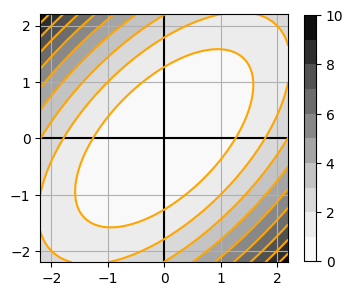

In [4]:
import numpy as np; import matplotlib.pyplot as plt
S = np.array([[5/2, 3/2], [3/2, 5/2]])
La, U = np.linalg.eigh(S); i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
I = U @ np.diag(1/La) @ U.T; print(La, "\n", U, "\n", I); x_min = y_min = -2.2; x_max = y_max = 2.2
X, Y = np.meshgrid(np.linspace(x_min, x_max, num=64), np.linspace(y_min, y_max, num=64))
XY = np.c_[np.ravel(X), np.ravel(Y)]; d = lambda xy: xy.T @ I @ xy; D = np.apply_along_axis(d, 1, XY)
fig, ax = plt.subplots(figsize=(4, 4))
ax.set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
ax.grid(); ax.axhline(0, color='black'); ax.axvline(0, color='black')
ax.contour(X, Y, D.reshape(X.shape), 10, colors='orange', linestyles='solid')
cp = ax.contourf(X, Y, D.reshape(X.shape), 10, cmap="Greys")
plt.colorbar(cp, ax=ax, shrink=0.8);

<p style="page-break-after:always;"></p>

# 4 Reducción de la dimensión

## 4.1 Análisis de componentes principales (PCA)

**Maldición de la dimensionalidad:** $\;$ muchas técnicas de aprendizaje automático empeoran sensiblemente con datos de alta dimensión

**Reducción de la dimensión:** $\;$ dada una matriz de $N$ datos en un espacio de alta dimensión, $\,\mathbb{R}^D,\,$ queremos aprender (no supervisadamente) una transformación de $\,\mathbb{R}^D\,$ en un espacio de dimensión reducida, $\,\mathbb{R}^K, K\ll D,\,$ que produzca una "buena aproximación" de los datos originales

**Codificación:** $\;$ operación de reducción de la dimensión, $\,\operatorname{encode}(\boldsymbol{x})=\boldsymbol{z},\,\boldsymbol{x}\in\mathbb{R}^D\,$ y $\,\boldsymbol{z}\in\mathbb{R}^K$

**Decodificación:** $\;$ operación de reconstrucción del dato original, $\,\operatorname{decode}(\boldsymbol{z})=\hat{\boldsymbol{x}},\,\hat{\boldsymbol{x}}\in\mathbb{R}^D\,$ y $\,\boldsymbol{z}\in\mathbb{R}^K$

**PCA:** $\;$ escoge una proyección lineal ortogonal $\,\mathbf{W}\in\mathbb{R}^{D\times K}\,$ de mínima **distorsión o error de reconstrucción**
$$\mathcal{L}(\mathbf{W})=\frac{1}{N}\sum_n\lVert\boldsymbol{x}_n-\operatorname{decode}(\operatorname{encode}(\boldsymbol{x}_n))\rVert_2^2%
\qquad\text{con}\quad%
\operatorname{encode}(\boldsymbol{x})=\mathbf{W}^t\boldsymbol{x}%
\quad\text{y}\quad%
\operatorname{decode}(\boldsymbol{z})=\mathbf{W}\boldsymbol{z}$$

<p style="page-break-after:always;"></p>

**Ejemplo:** $\;$ conjunto de $N=4$ bidimensionales que queremos reducir a unidimensionales con mínima distorsión

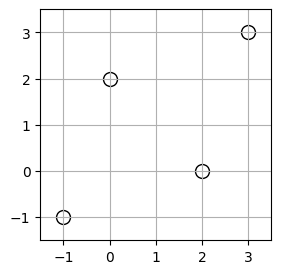

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X); fig, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect("equal"); plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True)
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100);

<p style="page-break-after:always;"></p>

**Ejercicio:** $\;$ codifica, decodifica y halla la distorsión de los datos del ejemplo con $\mathbf{W}=(1, 0)^t$
$$\begin{align*}
\boldsymbol{x}_1&=(-1,-1)^t&\boldsymbol{x}_2&=(0,2)^t&\boldsymbol{x}_3&=(2,0)^t&\boldsymbol{x}_4&=(3,3)^t\\
z_1&=\mathbf{W}^t\boldsymbol{x}_1=-1&z_2&=0&z_3&=2&z_4&=3\\
\hat{\boldsymbol{x}}_1&=\mathbf{W}z_1=(-1,0)^t&\hat{\boldsymbol{x}}_2&=(0,0)^t&\hat{\boldsymbol{x}}_3&=(2,0)^t&\hat{\boldsymbol{x}}_4&=(3,0)^t
\end{align*}$$
$$\mathcal{L}(\mathbf{W})=\frac{1}{4}\left(\lVert\boldsymbol{x}_1-\hat{\boldsymbol{x}}_1\rVert_2^2+\lVert\boldsymbol{x}_2-\hat{\boldsymbol{x}}_2\rVert_2^2+\lVert\boldsymbol{x}_3-\hat{\boldsymbol{x}}_3\rVert_2^2+\lVert\boldsymbol{x}_4-\hat{\boldsymbol{x}}_4\rVert_2^2\right)%
=\frac{1}{4}\left(1+4+0+9\right)=\frac{14}{4}=3.5$$

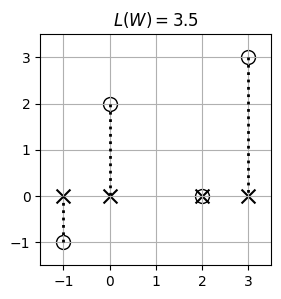

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from matplotlib.collections import LineCollection
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X); fig, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect("equal"); plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True)
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
K = 1; W = np.array([1, 0]).reshape(-1, K); Z = (X @ W).reshape(-1, K); hX = Z @ W.T
L = np.square(X - hX).sum(axis=1).mean(); ax.set_title(f'$L(W)={L}$')
plt.scatter(*hX.T, facecolor='black', s=100, marker='x')
lines = np.zeros((N, 2, 2)); lines[:, 0, :] = X; lines[:, 1, :] = hX
ax.add_collection(LineCollection(lines, linewidths=2, colors='black', linestyle='dotted'));

<p style="page-break-after:always;"></p>

**Ejercicio:** $\;$ codifica, decodifica y halla la distorsión de los datos del ejemplo con $\mathbf{W}=(\sqrt{2}/2, \sqrt{2}/2)^t$
$$\begin{align*}
\boldsymbol{x}_1&=(-1,-1)^t&\boldsymbol{x}_2&=(0,2)^t&\boldsymbol{x}_3&=(2,0)^t&\boldsymbol{x}_4&=(3,3)^t\\
z_1&=\mathbf{W}^t\boldsymbol{x}_1=-\sqrt{2}&z_2&=\sqrt{2}&z_3&=\sqrt{2}&z_4&=3\sqrt{2}\\
\hat{\boldsymbol{x}}_1&=\mathbf{W}z_1=(-1,-1)^t&\hat{\boldsymbol{x}}_2&=(1,1)^t&\hat{\boldsymbol{x}}_3&=(1,1)^t&\hat{\boldsymbol{x}}_4&=(3,3)^t
\end{align*}$$
$$\mathcal{L}(\mathbf{W})=\frac{1}{4}\left(\lVert\boldsymbol{x}_1-\hat{\boldsymbol{x}}_1\rVert_2^2+\lVert\boldsymbol{x}_2-\hat{\boldsymbol{x}}_2\rVert_2^2+\lVert\boldsymbol{x}_3-\hat{\boldsymbol{x}}_3\rVert_2^2+\lVert\boldsymbol{x}_4-\hat{\boldsymbol{x}}_4\rVert_2^2\right)%
=\frac{1}{4}\left(0+2+2+0\right)=1$$

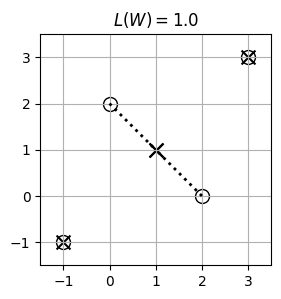

In [3]:
import numpy as np; import matplotlib.pyplot as plt; from matplotlib.collections import LineCollection
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X); fig, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect("equal"); plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True)
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
K = 1; W = np.array([np.sqrt(2)/2, np.sqrt(2)/2]).reshape(-1, K); Z = (X @ W).reshape(-1, K); hX = Z @ W.T
L = np.square(X - hX).sum(axis=1).mean(); ax.set_title(f'$L(W)={L}$')
plt.scatter(*hX.T, facecolor='black', s=100, marker='x')
lines = np.zeros((N, 2, 2)); lines[:, 0, :] = X; lines[:, 1, :] = hX
ax.add_collection(LineCollection(lines, linewidths=2, colors='black', linestyle='dotted'));

<p style="page-break-after:always;"></p>

**Cálculo de componentes principales:** $\;$ columnas de la proyección lineal ortogonal $\,\mathbf{W}\in\mathbb{R}^{D\times K}\,$ de mínima distorsión
* **Descomposición propia de la matriz de covarianzas empírica ordenada por $\lambda\text{s}$ en orden no creciente**
$$\mathbf{\Sigma}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^t\quad\text{donde}\quad\mathbf{U}=(\boldsymbol{u}_1,\dotsc,\boldsymbol{u}_D)\quad\text{y}\quad\mathbf{\Lambda}=\operatorname{diag}(\lambda_1,\dotsc,\lambda_n)\quad\text{con}\quad\lambda_1\geq\lambda_2\geq\cdots\geq\lambda_D$$
* **Minimizar la distorsión equivale a maximizar la varianza (de los datos proyectados)**
    * $\boldsymbol{u}_1$ es una dirección de proyección óptima para maximizar la varianza de los datos proyectados, siendo $\lambda_1$ dicha varianza
    * Entre todas las direcciones ortonormales a $\boldsymbol{u}_1$, $\boldsymbol{u}_2$ y $\lambda_2$ son dirección óptima de proyección y varianza correspondiente
    * Y así, sucesivamente, hasta $\boldsymbol{u}_K$ y $\lambda_K$
* **Proyección lineal ortogonal en $\,\mathbb{R}^K\,$ de mínima distorsión o máxima varianza retenida**
$$\mathbf{W}_{\text{pca}}=(\boldsymbol{u}_1,\dotsc,\boldsymbol{u}_K)\in\mathbb{R}^{D\times K}$$

**Ejercicio:** $\;$ calcula $\,\mathbf{W}_{\text{pca}}\,$ con los datos del ejemplo

* **Matriz de covarianzas empírica:** $\;$ normalización de la matriz de dispersión, $\,\mathbf{\Sigma}=\begin{bmatrix}\frac{5}{2} & \frac{3}{2}\\[1mm]\frac{3}{2} & \frac{5}{2}\end{bmatrix}$
* **Primera componente principal:** $\;\mathbf{W}_{\text{pca}}=\boldsymbol{u}_1=(\sqrt{2}/2, \sqrt{2}/2)^t$

In [4]:
import numpy as np; X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S); i = La.argsort()[::-1]; La = La[i]; U = U[:,i]; print(U[:, 0])

[0.70710678 0.70710678]


<p style="page-break-after:always;"></p>

**Centrado previo de datos:** $\;$ se suele hacer, aunque $\mathbf{\Sigma}$ (PCA) es invariante a traslaciones de los datos

**Elección de $K$:** $\;$ si se tiene $\mathbf{\Lambda}$, puede escogerse el menor $K$ que explique un cierto porcentaje (p.e. $90\%$) de la varianza total al menos
$$q_K=\frac{1}{\operatorname{tr}(\mathbf{\Sigma})}\sum_{k=1}^K\lambda_k%
\quad\text{con}\quad%
\operatorname{tr}(\mathbf{\Sigma})=\sum_{d=1}^D\lambda_d$$

**Ejercicio:** $\;$ halla la calidad de la proyección óptima del ejemplo
* **Valores propios de $\mathbf{\Sigma}$:** $\quad\lambda_1=4\,$ y $\,\lambda_2=1$
* **Calidad de la proyección:** $\quad q_1=4/5=80\%$

<p style="page-break-after:always;"></p>

# 5 Descomposición en valores singulares (SVD)

## 5.1 Conceptos básicos

**Singular value decomposition:** $\;$ generaliza la EVD a matrices rectangulares, del tipo $\mathbf{A}\in\mathbf{R}^{m\times n}$
$$\mathbf{A}=\mathbf{U}\mathbf{S}\mathbf{V}^t%
=\sigma_1\boldsymbol{u}_1\boldsymbol{v}_1^t+\cdots+\sigma_r\boldsymbol{u}_r\boldsymbol{v}_r^t$$

**Vectores singulares izquierdos:** $\;\mathbf{U}\in\mathbf{R}^{m\times m}$, de columnas ortonormales, $\mathbf{U}^t\mathbf{U}=\mathbf{I}$

**Valores singulares:** $\;\mathbf{S}\in\mathbf{R}^{m\times n}$ con $r=\min(m, n)$ valores $\sigma_i\geq 0$ en su diagonal; ceros fuera

**Vectores singulares derechos:** $\;\mathbf{V}\in\mathbf{R}^{n\times n}$, de filas y columnas ortonormales, $\mathbf{V}^t\mathbf{V}=\mathbf{V}\mathbf{V}^t=\mathbf{I}$

**Economy sized o thin SVD:** $\;$ ignora partes sombreadas

|  $m>n $                     |  $m<n$                          |
| --------------------------- | ------------------------------- |
| <img src="Figure_7.8_A.png" width="450"/> | <img src="Figure_7.8_B.png" width="450"/> |

<p style="page-break-after:always;"></p>

## 5.2 Conexión entre la SVD y la EVD

### 5.2.1 Matriz cuadrada real, simétrica y definida positiva

Sea $\mathbf{A}\in\mathbb{R}^{n\times n}$ real, simétrica y definida positiva, con EVD $\,\mathbf{A}=\mathbf{E}\mathbf{\Lambda}\mathbf{E}^t\,$ y $\,$ SVD $\,\mathbf{A}=\mathbf{U}\mathbf{S}\mathbf{V}^t$

**Valores singulares igual a propios:** $\;\mathbf{S}=\mathbf{\Lambda}$

**Vectores singulares izquierdos y derechos igual a propios (salvo cambios de signo):** $\;\mathbf{U}=\mathbf{V}=\mathbf{E}$

In [1]:
import numpy as np; X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); A = np.cov(X.T, bias=True)
L, E = np.linalg.eigh(A); i = L.argsort()[::-1]; L = L[i]; E = E[:,i]; print("EVD:\n", L, "\n", E, "\n")
U, S, Vt = np.linalg.svd(A) # np devuelve valores singulares en orden no creciente
print("SVD:\n", U, "\n", S, "\n", Vt)

EVD:
 [4. 1.] 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

SVD:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] 
 [4. 1.] 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


<p style="page-break-after:always;"></p>

### 5.2.2 Matriz real arbitraria

Sea $\mathbf{A}\in\mathbb{R}^{m\times n}$ real con SVD $\;\mathbf{A}=\mathbf{U}\mathbf{S}\mathbf{V}^t$

**Vectores y valores propios de $\mathbf{A}^t\mathbf{A}$:** $\;\mathbf{V}\;$ y $\;\mathbf{D}_n=\mathbf{S}^t\mathbf{S}$
$$\mathbf{A}^t\mathbf{A}=\mathbf{V}\mathbf{S}^t\mathbf{U}^t\mathbf{U}\mathbf{S}\mathbf{V}^t=\mathbf{V}(\mathbf{S}^t\mathbf{S})\mathbf{V}^t\;\Rightarrow\;(\mathbf{A}^t\mathbf{A})\mathbf{V}=\mathbf{V}\mathbf{D}_n$$

**Vectores y valores propios de $\mathbf{A}\mathbf{A}^t$:** $\;\mathbf{U}\;$ y $\;\mathbf{D}_m=\mathbf{S}\mathbf{S}^t$
$$\mathbf{A}\mathbf{A}^t=\mathbf{U}\mathbf{S}\mathbf{V}^t\mathbf{V}\mathbf{S}^t\mathbf{U}^t=\mathbf{U}(\mathbf{S}\mathbf{S}^t)\mathbf{U}^t\;\Rightarrow\;(\mathbf{A}\mathbf{A}^t)\mathbf{U}=\mathbf{U}\mathbf{D}_m$$

**Thin SVD:** $\;\mathbf{S}\in\mathbb{R}^{r\times r}\;$ con $r=\min(m, n),\;$ por lo que $\;\mathbf{D}=\mathbf{S}^2=\mathbf{S}^t\mathbf{S}=\mathbf{S}\mathbf{S}^t$

**Existencia de la SVD:** $\;$ la EVD no siempre existe (incluso con $\mathbf{A}$ cuadrada); $\;$ la SVD sí

<p style="page-break-after:always;"></p>

## 5.3 SVD truncada

### 5.3.1 SVD truncada

**SVD $K$-truncada:** $\;\mathbf{\hat{A}}_K=\mathbf{U}_K\mathbf{S}_K\mathbf{V}_K^t,\,$ aproximación de rango $K$ de $\mathbf{A}\in\mathbb{R}^{m\times n}$ construida a partir de sus $K$ mayores valores singulares, junto con sus $K$ vectores singulares asociados, izquierdos y derechos

**Optimalidad de la SVD $K$-truncada:** $\;\mathbf{\hat{A}}_K\,$ es la mejor aproximación de $\mathbf{A}$ en norma Frobenius (al cuadrado), $\,\lVert\mathbf{A}-\mathbf{\hat{A}}_K\rVert_F^2$

<p style="page-break-after:always;"></p>

### 5.3.2 PCA con la SVD

Sea $\mathbf{X}\in\mathbb{R}^{N\times D}$ una matriz de datos **centrada** de matriz de covarianzas empírica $\mathbf{\Sigma}=\frac{1}{N}\mathbf{X}^t\mathbf{X}\,$ (simétrica y semi-definida positiva) 

**SVD $K$-truncada de $\mathbf{X}$:** $\quad\mathbf{\hat{X}}_K=\mathbf{U}_K\mathbf{S}_K\mathbf{V}_K^t$

**SVD $K$-truncada de $\mathbf{\Sigma}$:** $\quad\mathbf{\hat{\Sigma}}_K=\mathbf{E}_K\boldsymbol{\Lambda}_K\mathbf{E}_K^t\;$ con $\;\mathbf{E}_K=\mathbf{V}_K\;$ y $\;\boldsymbol{\Lambda}_K=\frac{1}{N}\mathbf{S}_K^2$

**PCA de $\mathbf{X}$ con la SVD:** $\quad\operatorname{PCA}(\mathbf{X})=\mathbf{X}\mathbf{E}_K\approx\mathbf{U}_K\mathbf{S}_K\mathbf{V}_K^t\mathbf{V}_K=\mathbf{U}_K\mathbf{S}_K\quad$ no requiere $\mathbf{\Sigma}$

**Reconstrucción de $\mathbf{X}$ tras PCA:**  $\quad\mathbf{\hat{X}}_K=\operatorname{PCA}(\mathbf{X})\mathbf{V}_K^t$


In [1]:
import numpy as np; X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); X = X - np.mean(X, axis=0)
U, S, Vt = np.linalg.svd(X); Xr = U[:, 0] * S[0]
print("Datos centrados:\n", X, "\nComponente principal 1:\n", Vt[:, 0], "\nDatos reducidos:\n", Xr)
print("Datos reconstruidos:\n", Xr.reshape(-1, 1) @ Vt[0, :].reshape(1, -1))

Datos centrados:
 [[-2. -2.]
 [-1.  1.]
 [ 1. -1.]
 [ 2.  2.]] 
Componente principal 1:
 [0.70710678 0.70710678] 
Datos reducidos:
 [-2.82842712e+00  4.31373875e-16 -3.41684101e-17  2.82842712e+00]
Datos reconstruidos:
 [[-2.00000000e+00 -2.00000000e+00]
 [ 3.05027392e-16  3.05027392e-16]
 [-2.41607145e-17 -2.41607145e-17]
 [ 2.00000000e+00  2.00000000e+00]]


<p style="page-break-after:always;"></p>

# 6 Cálculo matricial

## 6.1 Preliminares


**Cálculo vectorial:** $\;$ análisis real multivariable de vectores en dos o más dimensiones

**Cálculo matricial:** $\;$ notación especializada para manejar derivadas parciales de una única función con respecto a muchas variables, o de una función multivariable con respecto a una única variable

**Referencia:** $\;$ [cálculo matricial en Wikipedia](https://en.wikipedia.org/wiki/Matrix_calculus)

<p style="page-break-after:always;"></p>

### 6.1.1 Formato numerador o Jacobiana

**Formato numerador o Jacobiana:** $\;$ primero el formato del numerador y luego el del denominador transpuesto, **si puede acodomarse en una matriz**

$$\small\begin{array}{clll}
\text{Tipos}&
\text{Escalar}\,y\in\mathbb{R}^{1\times 1}&
\text{Vector}\,\boldsymbol{y}\in\mathbb{R}^{m\times 1}&
\text{Matriz}\,\mathbf{Y}\in\mathbb{R}^{m\times n}\\\hline
x\in\mathbb{R}^{1\times 1}&
\dfrac{\partial y}{\partial x}&
\dfrac{\partial\boldsymbol{y}}{\partial x}=\begin{bmatrix}\dfrac{\partial y_1}{\partial x}\\[1mm]\vdots\\\dfrac{\partial y_m}{\partial x}\end{bmatrix}&
\dfrac{\partial\mathbf{Y}}{\partial x}=\begin{bmatrix}\dfrac{\partial y_{11}}{\partial x}&\cdots&\dfrac{\partial y_{1n}}{\partial x}\\[1mm]\vdots&\ddots&\vdots\\\dfrac{\partial y_{m1}}{\partial x}&\cdots&\dfrac{\partial y_{mn}}{\partial x}\end{bmatrix}\\
\boldsymbol{x}\in\mathbb{R}^{n\times 1}&
\dfrac{\partial y}{\partial\boldsymbol{x}}=\begin{bmatrix}\dfrac{\partial y}{\partial x_1}&\cdots&\dfrac{\partial y}{\partial x_n}\end{bmatrix}&
\dfrac{\partial\boldsymbol{y}}{\partial\boldsymbol{x}}=\begin{bmatrix}\dfrac{\partial y_1}{\partial\boldsymbol{x}}\\[1mm]\vdots\\\dfrac{\partial y_m}{\partial\boldsymbol{x}}\end{bmatrix}=\begin{bmatrix}\dfrac{\partial y_1}{\partial x_1}&\cdots&\dfrac{\partial y_1}{\partial x_n}\\[1mm]\vdots&\ddots&\vdots\\\dfrac{\partial y_m}{\partial x_1}&\cdots&\dfrac{\partial y_m}{\partial x_n}\end{bmatrix}&
\dfrac{\partial\mathbf{Y}}{\partial\boldsymbol{x}}=\begin{bmatrix}\dfrac{\partial y_{11}}{\partial\boldsymbol{x}}&\cdots&\dfrac{\partial y_{1n}}{\partial\boldsymbol{x}}\\[1mm]\vdots&\ddots&\vdots\\\dfrac{\partial y_{m1}}{\partial\boldsymbol{x}}&\cdots&\dfrac{\partial y_{mn}}{\partial\boldsymbol{x}}\end{bmatrix}\text{3-tensor}\\
\mathbf{X}\in\mathbb{R}^{p\times q}&
\dfrac{\partial y}{\partial\mathbf{X}}=\begin{bmatrix}\dfrac{\partial y}{\partial x_{11}}&\cdots&\dfrac{\partial y}{\partial x_{p1}}\\[1mm]\vdots&\ddots&\vdots\\\dfrac{\partial y}{\partial x_{1q}}&\cdots&\dfrac{\partial y}{\partial x_{pq}}\end{bmatrix}&
\dfrac{\partial\boldsymbol{y}}{\partial\mathbf{X}}=\begin{bmatrix}\dfrac{\partial y_1}{\partial\mathbf{X}}\\[1mm]\vdots\\\dfrac{\partial y_m}{\partial\mathbf{X}}\end{bmatrix}\text{3-tensor}&
\dfrac{\partial\mathbf{Y}}{\partial\mathbf{X}}=\begin{bmatrix}\dfrac{\partial y_{11}}{\partial\mathbf{X}}&\cdots&\dfrac{\partial y_{1n}}{\partial\mathbf{X}}\\[1mm]\vdots&\ddots&\vdots\\\dfrac{\partial y_{m1}}{\partial\mathbf{X}}&\cdots&\dfrac{\partial y_{mn}}{\partial\mathbf{X}}\end{bmatrix}\text{4-tensor}
\end{array}$$

<p style="page-break-after:always;"></p>

### 6.1.2 Otros formatos

**Formato denominador, gradiente o Hessiana:** $\;$ primero el formato del denominador y luego el del numerador transpuesto, si puede acodomarse en una matriz
* El resultado es el mismo que en formato numerador, aunque transpuesto

**Origen de los dos formatos:** $\;$ se halla, sobre todo, en el formato que se da a $\;\dfrac{\partial\boldsymbol{y}}{\partial\boldsymbol{x}}$

**Formato mixto:** $\;$ consiste en escribir $\;\dfrac{\partial\boldsymbol{y}}{\partial\boldsymbol{x}^t}\;$ y seguir el formato numerador

<p style="page-break-after:always;"></p>

## 6.2 Identidades básicas

**Identidades para escalares:** $\;a\,$ constante; $\;u\,$ y $\,v\,$ funciones reales de $\,x\in\mathbb{R}^{1\times 1},\,$ $\boldsymbol{x}\in\mathbb{R}^{n\times 1}\,$ o $\,\mathbf{X}\in\mathbb{R}^{p\times q}$

|$y\in\mathbb{R}^{1\times 1}$|$\dfrac{\partial y}{\partial x}\in\mathbb{R}^{1\times 1}$|$\dfrac{\partial y}{\partial\boldsymbol{x}}\in\mathbb{R}^{1\times n}$|$\dfrac{\partial y}{\partial\mathbf{X}}\in\mathbb{R}^{q\times p}$|
|:-:|:-:|:-:|:-:|
|$a$|$0$|$\boldsymbol{0}$|$\mathbf{0}$|
|$au$|$a\dfrac{\partial u}{\partial x}$|$a\dfrac{\partial u}{\partial\boldsymbol{x}}$|$a\dfrac{\partial u}{\partial\mathbf{X}}$|
|$u+v$|$\dfrac{\partial u}{\partial x}+\dfrac{\partial v}{\partial x}$|$\dfrac{\partial u}{\partial\boldsymbol{x}}+\dfrac{\partial v}{\partial\boldsymbol{x}}$|$\dfrac{\partial u}{\partial\mathbf{X}}+\dfrac{\partial v}{\partial\mathbf{X}}$|
|$uv$|$u\dfrac{\partial v}{\partial x}+v\dfrac{\partial u}{\partial x}$|$u\dfrac{\partial v}{\partial\boldsymbol{x}}+v\dfrac{\partial u}{\partial\boldsymbol{x}}$|$u\dfrac{\partial v}{\partial\mathbf{X}}+v\dfrac{\partial u}{\partial\mathbf{X}}$|
|$g(u)$|$\dfrac{\partial g(u)}{\partial u}\dfrac{\partial u}{\partial x}$|$\dfrac{\partial g(u)}{\partial u}\dfrac{\partial u}{\partial\boldsymbol{x}}$|$\dfrac{\partial g(u)}{\partial u}\dfrac{\partial u}{\partial\mathbf{X}}$|
|$f(g(u))$|$\dfrac{\partial f(g)}{\partial g}\dfrac{\partial g(u)}{\partial u}\dfrac{\partial u}{\partial x}$|$\dfrac{\partial f(g)}{\partial g}\dfrac{\partial g(u)}{\partial u}\dfrac{\partial u}{\partial\boldsymbol{x}}$|$\dfrac{\partial f(g)}{\partial g}\dfrac{\partial g(u)}{\partial u}\dfrac{\partial u}{\partial\mathbf{X}}$|

<p style="page-break-after:always;"></p>

**Identidades para vectores:** $\;\boldsymbol{a}\,$ constante; $\;\boldsymbol{u}\,$ y $\,\boldsymbol{v}\,$ funciones vectoriales de $\,x\in\mathbb{R}^{1\times 1}\,$ o $\,\boldsymbol{x}\in\mathbb{R}^{n\times 1}$

|$\boldsymbol{y}\in\mathbb{R}^{m\times 1}$|$\dfrac{\partial\boldsymbol{y}}{\partial x}\in\mathbb{R}^{m\times 1}$|$\dfrac{\partial\boldsymbol{y}}{\partial\boldsymbol{x}}\in\mathbb{R}^{m\times n}$|
|:-:|:-:|:-:|
|$\boldsymbol{a}$|$\boldsymbol{0}$|$\mathbf{0}$|
|$a\boldsymbol{u}$|$a\dfrac{\partial\boldsymbol{u}}{\partial x}$|$a\dfrac{\partial\boldsymbol{u}}{\partial\boldsymbol{x}}$|
|$\boldsymbol{u}+\boldsymbol{v}$|$\dfrac{\partial\boldsymbol{u}}{\partial x}+\dfrac{\partial\boldsymbol{v}}{\partial x}$|$\dfrac{\partial\boldsymbol{u}}{\partial\boldsymbol{x}}+\dfrac{\partial\boldsymbol{v}}{\partial\boldsymbol{x}}$|
|$\boldsymbol{g}(\boldsymbol{u})$|$\dfrac{\partial\boldsymbol{g}(\boldsymbol{u})}{\partial\boldsymbol{u}}\dfrac{\partial \boldsymbol{u}}{\partial x}$|$\dfrac{\partial\boldsymbol{g}(\boldsymbol{u})}{\partial \boldsymbol{u}}\dfrac{\partial\boldsymbol{u}}{\partial\boldsymbol{x}}$|
|$\boldsymbol{f}(\boldsymbol{g}(\boldsymbol{u}))$|$\dfrac{\partial\boldsymbol{f}(\boldsymbol{g})}{\partial\boldsymbol{g}}\dfrac{\partial\boldsymbol{g}(\boldsymbol{u})}{\partial\boldsymbol{u}}\dfrac{\partial\boldsymbol{u}}{\partial x}$|$\dfrac{\partial\boldsymbol{f}(\boldsymbol{g})}{\partial\boldsymbol{g}}\dfrac{\partial\boldsymbol{g}(\boldsymbol{u})}{\partial\boldsymbol{u}}\dfrac{\partial\boldsymbol{u}}{\partial\boldsymbol{x}}$|

<p style="page-break-after:always;"></p>

**Identidades para matrices:** $\;a\,$ y $\,\mathbf{A}\,$ constantes; $\;\mathbf{U}\,$ y $\,\mathbf{V}\,$ funciones matriciales de $x$

|$\mathbf{Y}\in\mathbb{R}^{m\times n}$|$\dfrac{\partial\mathbf{Y}}{\partial x}\in\mathbb{R}^{m\times n}$|
|:-:|:-:|
|$\mathbf{A}$|$\mathbf{0}$|
|$a\mathbf{U}$|$a\dfrac{\partial\mathbf{U}}{\partial x}$|
|$\mathbf{U}+\mathbf{V}$|$\dfrac{\partial\mathbf{U}}{\partial x}+\dfrac{\partial\mathbf{V}}{\partial x}$|
|$\mathbf{U}\mathbf{V}$|$\mathbf{U}\dfrac{\partial\mathbf{V}}{\partial x}+\dfrac{\partial\mathbf{U}}{\partial x}\mathbf{V}$|

<p style="page-break-after:always;"></p>

## 6.3 Derivadas básicas

**Sigmoide:** $\displaystyle\quad\sigma(x)=\frac{1}{1+e^{-x}}$
$$\frac{\partial\sigma(x)}{\partial x}%
%=-\frac{1}{(1+e^{-x})^2}e^{-x}(-1)%
=\frac{e^{-x}}{(1+e^{-x})^2}%
=\frac{1+e^{-x}-1}{(1+e^{-x})^2}%
=\frac{1}{1+e^{-x}}-\frac{1}{(1+e^{-x})^2}%
=\frac{1}{1+e^{-x}}\left(1-\frac{1}{1+e^{-x}}\right)%
=\sigma(x)(1-\sigma(x))%
=\sigma(x)\sigma(-x)$$

**Pérdida cuadrática:** $\quad\ell_2(y,\hat{y})=\frac{1}{2}(y-\hat{y})^2$
$$\dfrac{\partial\ell_2(y,\hat{y})}{\partial\hat{y}}=\hat{y}-y$$

**Log-pérdida:** $\quad\ell(\boldsymbol{y},\hat{\boldsymbol{y}})=-\sum_cy_c\log\hat{y}_c$
$$\dfrac{\partial\ell(\boldsymbol{y},\hat{\boldsymbol{y}})}{\partial\hat{\boldsymbol{y}}}=\left(\dfrac{\partial\ell(\boldsymbol{y},\hat{\boldsymbol{y}})}{\partial\hat{y}_1},\cdots,\dfrac{\partial\ell(\boldsymbol{y},\hat{\boldsymbol{y}})}{\partial\hat{y}_C}\right)=\left(-\dfrac{y_1}{\hat{y}_1},\dotsc,-\dfrac{y_C}{\hat{y}_C}\right)$$

<p style="page-break-after:always;"></p>

## 6.4 Softmax

**Softmax:** $\displaystyle\quad\boldsymbol{\mu}=\mathcal{S}(\boldsymbol{a})=\left(\frac{e^{a_1}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}},\dotsc,\frac{e^{a_C}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}}\right)^t$

$$\small\begin{align*}
\frac{\partial\mu_i}{\partial a_j}%
&=e^{a_i}\frac{\partial\left(\sum_{\tilde{c}}e^{a_{\tilde{c}}}\right)^{-1}}{\partial a_j}
+\frac{1}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}}\frac{\partial e^{a_i}}{\partial a_j}
=-\frac{e^{a_i}e^{a_j}}{\left(\sum_{\tilde{c}}e^{a_{\tilde{c}}}\right)^2}
+\frac{e^{a_i}\mathbb{I}(i=j)}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}}
=\mu_i(\mathbb{I}(i=j)-\mu_j)\\
\frac{\partial\boldsymbol{\mu}}{\partial\boldsymbol{a}}%
&=\begin{pmatrix}\frac{\partial\mu_1}{\partial\boldsymbol{a}}\\\frac{\partial\mu_2}{\partial\boldsymbol{a}}\\\vdots\\\frac{\partial\mu_C}{\partial\boldsymbol{a}}\end{pmatrix}%
=\begin{pmatrix}\frac{\partial\mu_1}{\partial a_1}&\frac{\partial\mu_1}{\partial a_2}&\cdots&\frac{\partial\mu_1}{\partial a_C}\\
\frac{\partial\mu_2}{\partial a_1}&\frac{\partial\mu_2}{\partial a_2}&\cdots&\frac{\partial\mu_2}{\partial a_C}\\
\vdots&\vdots&\ddots&\vdots\\%
\frac{\partial\mu_C}{\partial a_1}&\frac{\partial\mu_C}{\partial a_2}&\cdots&\frac{\partial\mu_C}{\partial a_C}\end{pmatrix}
=\begin{pmatrix}
\mu_1(1-\mu_1)&-\mu_1\mu_2&\cdots&-\mu_1\mu_C\\
-\mu_2\mu_1&\mu_2(1-\mu_2)&\cdots&-\mu_2\mu_C\\
\vdots&\vdots&\ddots&\vdots\\%
-\mu_C\mu_1&-\mu_C\mu_2&\cdots&\mu_C(1-\mu_C)
\end{pmatrix}
=\operatorname{diag}(\boldsymbol{\mu})-\boldsymbol{\mu}^t\boldsymbol{\mu}\\\\
\frac{\partial\log\mu_i}{\partial a_j}%
&=\frac{\partial\log\mu_i}{\partial\mu_i}%
\frac{\partial\mu_i}{\partial a_j}
=\frac{1}{\mu_i}\mu_i(\mathbb{I}(i=j)-\mu_j)
=\mathbb{I}(i=j)-\mu_j\\
\frac{\partial\log\boldsymbol{\mu}}{\partial\boldsymbol{a}}%
&=\begin{pmatrix}
\frac{\partial\log\mu_1}{\partial\boldsymbol{a}}\\
\frac{\partial\log\mu_2}{\partial\boldsymbol{a}}\\
\vdots\\
\frac{\partial\log\mu_C}{\partial\boldsymbol{a}}\end{pmatrix}%
=\begin{pmatrix}
\frac{\partial\log\mu_1}{\partial a_1}%
&\frac{\partial\log\mu_1}{\partial a_2}
&\cdots
&\frac{\partial\log\mu_1}{\partial a_C}\\
\frac{\partial\log\mu_2}{\partial a_1}%
&\frac{\partial\log\mu_2}{\partial a_2}
&\cdots
&\frac{\partial\log\mu_2}{\partial a_C}\\
\vdots&\vdots&\ddots&\vdots\\%
\frac{\partial\log\mu_C}{\partial a_1}%
&\frac{\partial\log\mu_C}{\partial a_2}
&\cdots
&\frac{\partial\log\mu_C}{\partial a_C}
\end{pmatrix}
=\begin{pmatrix}
1-\mu_1&-\mu_2&\cdots&-\mu_C\\
-\mu_1&1-\mu_2&\cdots&-\mu_C\\
\vdots&\vdots&\ddots&\vdots\\%
-\mu_1&-\mu_2&\cdots&1-\mu_C
\end{pmatrix}
=\operatorname{diag}(\boldsymbol{1}_C)-\boldsymbol{1}_C\boldsymbol{\mu}^t\end{align*}$$